**RUN THIS CELL BEFORE DOING ANYTHING ELSE:**

In [ ]:
!pip3 install --upgrade git+https://github.com/ptgodart/nasaPoly.git
%matplotlib inline

  Cloning https://github.com/ptgodart/nasaPoly.git to /tmp/pip-req-build-csc7yjjg
  Running command git clone -q https://github.com/ptgodart/nasaPoly.git /tmp/pip-req-build-csc7yjjg
  Created wheel for nasaPoly: filename=nasaPoly-0.0.1-py3-none-any.whl size=275524 sha256=2f51c39b7f0b77d1675137468164b9ee85787feef419cb178ccc950e5ca01c7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ac5ixcz_/wheels/0d/3b/36/9129e6f4450281e6d729bb6c955067eab00b0c9c63a572818c
Successfully built nasaPoly


# Problem Set 3 - SOLUTION

Thermodynamics and Climate Change

MOSTEC 2021

## Problem 4: Exploring Entropy

### Part a:
For these problems, we need to integrate over c_p as it is a function of temperature. We will start with Eq. 4.74 in the course notes. In this part we have both temperature and pressure varying, thus

In [1]:
import nasaPoly # for thermodynamic functions
from matplotlib import pyplot as plt # for plotting
import numpy as np # for general math stuff
from scipy.integrate import quad

CO2 = nasaPoly.Species('CO2')
R = 8.314 # J/mol-K

# Enter solutions below:
T_1_a = 600 # K
T_2_a = 400 # K
P_1_a = 10e5 # Pa
P_2_a = 1e5 # Pa

# delta_s = integral of cp(T)/T - R/P from state 1 to 2
delta_s_a = quad(lambda T: CO2.cp_0(T)/T, T_1_a, T_2_a)[0] - R*np.log(P_2_a/P_1_a)
print(f'Change in entropy is {delta_s_a:.4g} J/mol-K')

ModuleNotFoundError: ignored

Note, we didn't have to integrate over the pressure term as R is not a function of temperature and the temperature dependence is all lumped into the first term with c_p.

### Part b:
Same idea as in part a but now specific volume and temperature are changing:

In [ ]:
# Enter solutions below:
T_1_b = 300 # K
T_2_b = 700 # K
v_1_b = 4 # m^3/mol
v_2_b = 2 # m^3/mol

cv_CO2 = lambda T: CO2.cp_0(T) - R

delta_s_b = quad(lambda T: cv_CO2(T)/T, T_1_b, T_2_b)[0] + R*np.log(v_2_b/v_1_b)
print(f'Change in entropy is {delta_s_b:.4g} J/mol-K')

Change in entropy is 23.92 J/mol-K


### Part c:
Isobaric, so we can actually use the entropy provided by NASA directly

In [ ]:
# Enter solutions below:
T_1_c = 600 # K
T_2_c = 900 # K
delta_s_c = CO2.s_0(T_2_c) - CO2.s_0(T_1_c)
print(f'Change in entropy is {delta_s_c:.4g} J/mol-K')

Change in entropy is 20.36 J/mol-K


In [ ]:
# Or equivalently by integrating cp(T)/T for isobaric process:
delta_s_c_int = quad(lambda T: CO2.cp_0(T)/T, T_1_c, T_2_c)[0]
print(f'Change in entropy is {delta_s_c_int:.4g} J/mol-K')

Change in entropy is 20.36 J/mol-K


## Challenge Problem: Non-Isothermal Gas Mixing

### Part a:

In [ ]:
# Enter solutions below:
N2 = nasaPoly.Species('N2')
# In state 1:

# N2:
m_N2 = 2 # kg
M_N2 = 28.014e-3 # kg/mol
T_N2_1 = 400 # K
P_N2_1 = 5e5 # Pa
V_N2_1 = m_N2*(R/M_N2)*T_N2_1/P_N2_1

m_CO2 = 1 # kg
M_CO2 = 44.01e-3 # g/mol
T_CO2_1 = 600 # K
P_CO2_1 = 10e5 # Pa
V_CO2_1 = m_CO2*(R/M_CO2)*T_CO2_1/P_CO2_1

print(f'N2 Volume: {V_N2_1:.3g} m^3\nCO2 Volume: {V_CO2_1:.3g} m^3')

N2 Volume: 0.475 m^3
CO2 Volume: 0.113 m^3


### Part b:

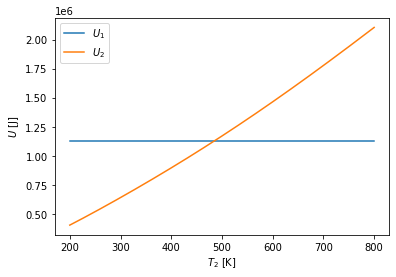

In [ ]:
# Enter solutions below:
# First Law for CV around volume V: U_2 - U_1 = Q - W = 0
# Therefore: U_2 = U_1, or (mc_vT)_N2_1 + (mc_vT)_CO2_1 = (mc_vT)_mixture_2
# Also the partial volumes must add to V in state 2.

# Convert to molar:
n_N2 = m_N2/M_N2
n_CO2 = m_CO2/M_CO2
n_total = n_N2 + n_CO2

cv_N2 = lambda T: N2.cp_0(T) - R

# Mixture properties:
cv_mix = lambda T: (n_N2*cv_N2(T) + n_CO2*cv_CO2(T))/n_total # (weighted sum of individual properties)
V_2 = V_N2_1 + V_CO2_1

# State 1:
U_N2_1 = n_N2*cv_N2(T_N2_1)*T_N2_1
U_CO2_1 = n_CO2*cv_CO2(T_CO2_1)*T_CO2_1
U_1 = U_N2_1 + U_CO2_1

# We cannot solve for T_2 directly because c_v is a function of temperature 
# itself. Instead, we must either solve iteratively or graphically. Graphically:

# State 2:
U_2 = lambda T: n_total*cv_mix(T)*T

# Plotting U_2 and U_1:
T_sweep = np.linspace(200, 800, 250) # K
plt.plot(T_sweep, [U_1 for T in T_sweep], label='$U_1$')
plt.plot(T_sweep, [U_2(T) for T in T_sweep], label='$U_2$')
plt.legend()
plt.xlabel('$T_2$ [K]')
plt.ylabel('$U$ [J]')
plt.show()

In [ ]:
from scipy.optimize import fminbound
# Now we can solve this by seeing where these curves intersect, or for where 
# U_2 - U_1 = 0

T_2 = fminbound(lambda T: np.abs(U_2(T) - U_1), 200, 800)

print(f'Temperature of the mixture, T_2 = {T_2:.4g} K')

Temperature of the mixture, T_2 = 485.1 K


In [ ]:
# We can solve this same problem iteratively by guessing a temperature,
# solving for the temperature, then repeating until the values converge:

T_thresh = 0.1 # K
T_solve = 200 # K (initial guess)
T_guess = T_solve + 2*T_thresh # To ensure that loop starts
T_guess_array = []
T_solve_array = []

while (np.abs(T_guess - T_solve) > T_thresh):
  T_guess = T_solve
  T_solve = U_1 / (n_total*cv_mix(T_guess)) # First Law
  # For plotting purposes (not necessary for solving)
  T_guess_array.append(T_guess) 
  T_solve_array.append(T_solve)

print(f'Temperature of the mixture, T_2 = {T_solve:.4g} K')

Temperature of the mixture, T_2 = 485.1 K


which, as we'd expect, is the same value! For this problem, the iterative method took a few more lines of code, but for more complex problems, this is typically the only way to solve for the various states.

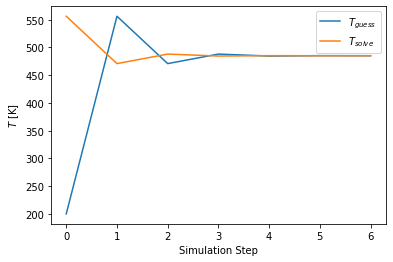

In [ ]:
# For fun, let's plot the T_guess and T_solve values at each iteration step:
plt.plot(T_guess_array, label='$T_{guess}$')
plt.plot(T_solve_array, label='$T_{solve}$')
plt.xlabel('Simulation Step')
plt.ylabel('$T$ [K]')
plt.legend()
plt.show()

We can see it only took several iterations for the answer to converge! So this is actually a pretty efficient process for solving this type of problem. For more complex computations, you can sacrifice some accuracy to reduce compute time.

### Part c:

In [ ]:
# Enter solutions below:
# We can treat each gas separately since they are ideal gases and then sum the
# results:

delta_S_N2 = n_N2*(quad(lambda T: cv_N2(T)/T, T_N2_1, T_2)[0] + R*np.log(V_2/V_N2_1))
delta_S_CO2 = n_CO2*(quad(lambda T: cv_CO2(T)/T, T_CO2_1, T_2)[0] + R*np.log(V_2/V_CO2_1))
delta_S_total = delta_S_N2 + delta_S_CO2

print(f'The entropy generated is {delta_S_total:.4g} J/K')

The entropy generated is 547.2 J/K


### Part d:

In [ ]:
# Enter solutions below:
# Using Eq. 4.127 in the course notes, we can compute this minimum work assuming
# that the separation occurs isothermally at 300 K as:

T_separation = 300 # K
X_N2 = n_N2 / n_total
X_CO2 = n_CO2 / n_total
W_min = -n_total*R*T_separation*(X_N2*np.log(X_N2) + X_CO2*np.log(X_CO2)) # J

print(f'Minimum work of separation at {T_separation} K is {W_min*1e-3:.4g} kJ')

Minimum work of separation at 300 K is 129.7 kJ
